#  Clone the github repo and import necessary libraries



In [ ]:
! git clone https://github.com/AntonioGarciaGarvi/Celegans-Lifespan-Automation-Using-Deep-Learning 
%cd Celegans-Lifespan-Automation-Using-Deep-Learning/Demo_files/
import os
import cnn_lstm_model
import utils_lifespan_demo
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

Cloning into 'Celegans-Lifespan-Automation-Using-Deep-Learning'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 139 (delta 35), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (139/139), 22.85 MiB | 3.16 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/Celegans-Lifespan-Automation-Using-Deep-Learning/Demo_files


# Load trained model and demo dataset

In [ ]:
!wget https://active-vision.ai2.upv.es/wp-content/uploads/2022/03/models.zip # download  model
!unzip 'models.zip'

--2022-03-12 12:12:11--  https://active-vision.ai2.upv.es/wp-content/uploads/2022/03/models.zip
Resolving active-vision.ai2.upv.es (active-vision.ai2.upv.es)... 158.42.163.26
Connecting to active-vision.ai2.upv.es (active-vision.ai2.upv.es)|158.42.163.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666531699 (636M) [application/zip]
Saving to: ‘models.zip’

models.zip          100%[===================>] 635.65M  20.3MB/s    in 33s     

2022-03-12 12:12:44 (19.5 MB/s) - ‘models.zip’ saved [666531699/666531699]

Archive:  models.zip
   creating: models/
  inflating: models/CelegansDetection_FasterRCNN.pth  
  inflating: models/Lifespan_CNN_LSTM.pth  


In [ ]:
nw = cnn_lstm_model.LSTM_CNN_3_layers(seq_length=57,img_size=256, kernel_s_layer_1=5, kernel_s=5, max1=3, max2=4, max3=2,out_channels_1=4, out_channels_2=8, out_channels_final=16,LSTM_hidden=1024, LSTM_layers=2, p=0)
nw.load_state_dict(torch.load('/content/Celegans-Lifespan-Automation-Using-Deep-Learning/Demo_files/models/Lifespan_CNN_LSTM.pth'))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
nw.to(device)
# Load synthetic images generated in the detecion and domain change step
testdir = '/content/Celegans-Lifespan-Automation-Using-Deep-Learning/Demo_files/Lifespan_demo_imgs/'
data_transform = transforms.ToTensor()
data_test = utils_lifespan_demo.LifespanDatasetTest(root_dir=testdir, seq_length=57,transform=data_transform)
dataloader_test = torch.utils.data.DataLoader(data_test, batch_size=1, shuffle=False, num_workers=0)

# Make predictions and visualize lifespan curve

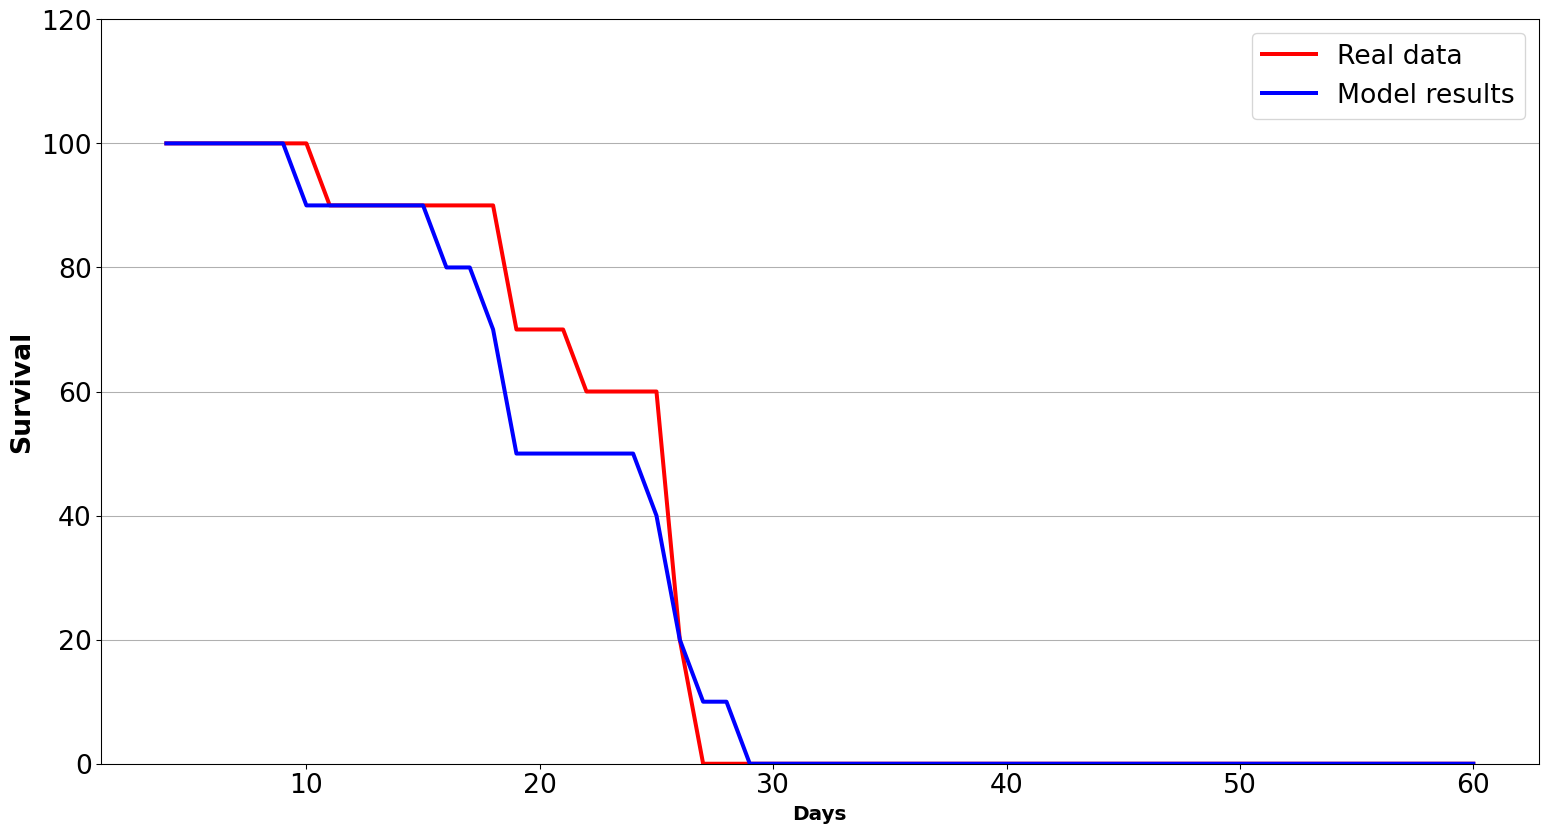

In [ ]:
nw.eval()
with torch.no_grad():
  batch = next(iter(dataloader_test))
  current_batch = batch[0].cuda()
  current_labels = batch[1].cuda()
  pre = nw(current_batch)
  pre = utils_lifespan_demo.post_process_filter2(current_labels[0], pre[0], filter_limit=True, filter_correction=True,mlife=14)
  utils_lifespan_demo.plot_real_model_curves(current_labels[0], pre)
  